In [72]:
import pandas as pd
import json 
from glob import glob
from tqdm.auto import tqdm
import seaborn as sns

In [139]:
rdir = 'S-Dim-ep2-fig5'

frames = []
for f in tqdm(glob('/'.join([rdir,'*.json']))):
    with open(f, 'r') as of:
        data = json.load(of)
        frames.append(data)

df = pd.DataFrame(frames)
df


  0%|          | 0/3000 [00:00<?, ?it/s]

,G,S,Dim,Damp,MU,Seed,max_loops,epsilon,fail_loop
0,500,100,75,1,0.01,14185,100000,2.0,100000
1,500,100,25,1,0.01,21666,100000,2.0,100000
2,500,600,75,1,0.01,29281,100000,2.0,100000
3,500,900,125,1,0.01,31192,100000,2.0,100000
4,500,900,75,1,0.01,2554,100000,2.0,100000
...,...,...,...,...,...,...,...,...,...
2995,500,900,15,1,0.01,29281,100000,2.0,15874
2996,500,600,50,1,0.01,6081,100000,2.0,100000
2997,500,400,150,1,0.01,17798,100000,2.0,100000
2998,500,100,100,1,0.01,2230,100000,2.0,100000


In [128]:
df['Seed'].value_counts()


6143     100
4906     100
29113    100
30691    100
17109    100
27201    100
4775     100
3874     100
9348     100
17576    100
12325    100
22646    100
5291     100
32214    100
17828    100
5061     100
22680    100
7139     100
29473    100
1935     100
8817     100
16886    100
7820     100
13954    100
15323    100
30854    100
27510    100
1424     100
30654    100
6641     100
Name: Seed, dtype: int64

In [133]:
max_loop = 100000
n_iters = 30

In [140]:
new_df = df.groupby(['S', 'Dim'])['fail_loop'].apply(lambda x: 1 - ((x < max_loop - 1).sum()/n_iters)).reset_index()
new_df

,S,Dim,fail_loop
0,100,5,0.000000
1,100,15,0.833333
2,100,25,0.933333
3,100,50,1.000000
4,100,75,1.000000
...,...,...,...
95,1000,100,1.000000
96,1000,125,1.000000
97,1000,150,1.000000
98,1000,175,1.000000


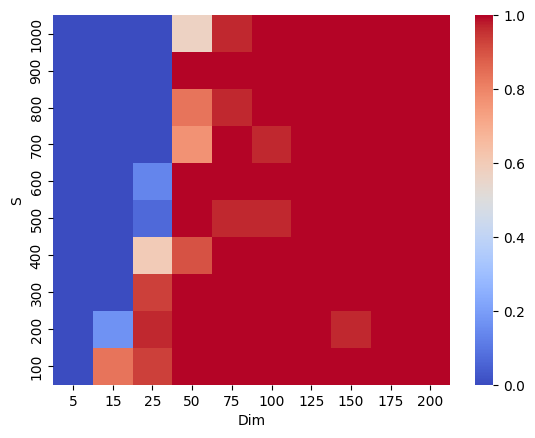

In [141]:
pivot_table = new_df.pivot_table(index='S', columns='Dim', values='fail_loop')
ax = sns.heatmap(pivot_table, cmap='coolwarm', annot=False, fmt=".1f")
ax.invert_yaxis()